In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date
import seaborn as sns

%matplotlib inline

In [2]:
donations_clean = pd.read_csv('data/donations_clean.csv')

### Grouping year/month for further analysis
Grouping by year to further see if any data may be incomplete.  Looking at 2012 and 2018, the counts are much lower than the other years so they may be incomplete.

In [3]:
donations_clean.groupby('year').count()

,id,date,amount,month
year,,,,
2012,149,149,149,149
2013,573983,573983,573983,573983
2014,746608,746608,746608,746608
2015,783362,783362,783362,783362
2016,957265,957265,957265,957265
2017,1190542,1190542,1190542,1190542
2018,435975,435975,435975,435975


#### As we thought, 2012 and 2018 have missing months so we need to decide what to do with them, if anything.

In [4]:
donations_clean.groupby(['year', 'month']).count()

id    date  amount
year month                        
2012 10         74      74      74
     11          8       8       8
     12         67      67      67
2013 1       22141   22141   22141
     2       32268   32268   32268
     3       32892   32892   32892
     4       28792   28792   28792
     5       33390   33390   33390
     6       28686   28686   28686
     7       35328   35328   35328
     8       62967   62967   62967
     9       93778   93778   93778
     10      65304   65304   65304
     11      60374   60374   60374
     12      78063   78063   78063
2014 1       50732   50732   50732
     2       55472   55472   55472
     3       68004   68004   68004
     4       45856   45856   45856
     5       38218   38218   38218
     6       34222   34222   34222
     7       47501   47501   47501
     8      103559  103559  103559
     9       89033   89033   89033
     10      73007   73007   73007
     11      54694   54694   54694
     12      86310   86310   86310
2015 1       67746   67746   67746
     2       61536   61536   61536
     3       63558   63558   63558
...            ...     ...     ...
     12      94473   94473   94473
2016 1       59069   59069   59069
     2       65706   65706   65706
     3       89520   89520   89520
     4       48296   48296   48296
     5       46409   46409   46409
     6       40176   40176   40176
     7       65972   65972   65972
     8      140603  140603  140603
     9      116665  116665  116665
     10      81104   81104   81104
     11     106781  106781  106781
     12      96964   96964   96964
2017 1       95324   95324   95324
     2       94443   94443   94443
     3      115851  115851  115851
     4       54822   54822   54822
     5       59425   59425   59425
     6       56363   56363   56363
     7       95112   95112   95112
     8      169609  169609  169609
     9      120183  120183  120183
     10     114897  114897  114897
     11     115538  115538  115538
     12      98975   98975   98975
2018 1      116930  116930  116930
     2       87280   87280   87280
     3       95386   95386   95386
     4      111018  111018  111018
     5       25361   25361   25361

[68 rows x 3 columns]

#### For the next part of this analysis, lets drop 2012 and 2018 so we ony have complete years to work with

In [5]:
donations_gb = donations_clean[(donations_clean.year != 2012) & (donations_clean.year != 2018)]
donations_gb.groupby('year').count()

,id,date,amount,month
year,,,,
2013,573983,573983,573983,573983
2014,746608,746608,746608,746608
2015,783362,783362,783362,783362
2016,957265,957265,957265,957265
2017,1190542,1190542,1190542,1190542


### Data Analysis: What to look for?
While this is a rather large dataset, it is also very limited.   Some things we can look for that would be interesting to a non-profit organization in regards to their dontations are:
-  When should we focus our donation drive?
-  How should we focus our donation drive?
-  Do we target all donators the same way?

#### First, lets do some grouping & plotting by year to see if the dollar amount of dontations has increased/decreased over period of time

In [6]:
donations_gb = donations_gb.groupby(['year', 'month']).sum().reset_index()
donations_gb.head()

,year,month,amount
0,2013,1,834960
1,2013,2,1502144
2,2013,3,1503283
3,2013,4,1456045
4,2013,5,1877268


Text(0, 0.5, 'Amount')

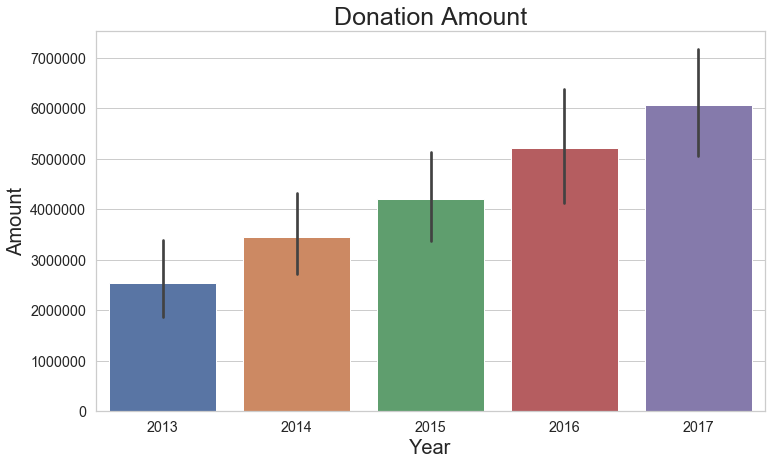

In [7]:
plt.figure(figsize=(12, 7))
sns.set(style='whitegrid', font_scale=1.3)
ax = sns.barplot(x='year', y='amount', data=donations_gb)
plt.title('Donation Amount', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Amount', fontsize=20)

#### Steady increases in the donation amounts over the years.  Good sign that the nonprofit group is healthy and thriving

Text(0, 0.5, 'Amount')

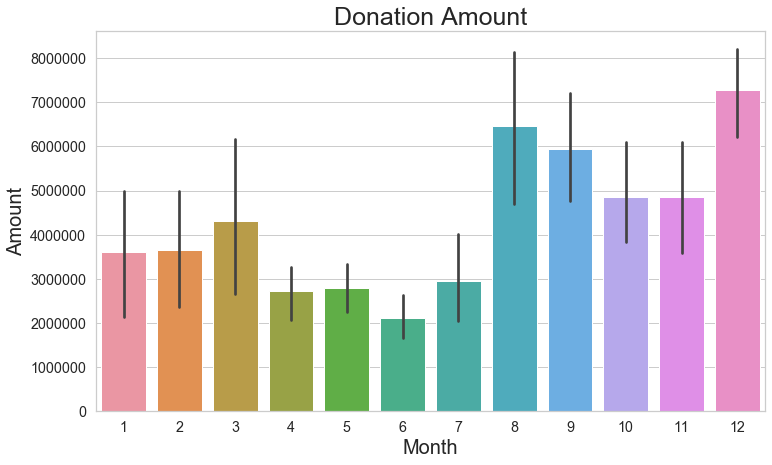

In [8]:
plt.figure(figsize=(12, 7))
sns.set(style='whitegrid', font_scale=1.3)
ax = sns.barplot(x='month', y='amount', data=donations_gb)
plt.title('Donation Amount', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Amount', fontsize=20)

 Looking by months, we see the donation amounts are much higher toward the end of the year.  As this is a nonprofit organization, this could be caused by end of the year donation drives followed by holiday parties/fund raising events.  This is something we could  confirm with the group.  If this is the case, they could think about delaying their fall campaign by a month and do a small fundraising push in the spring, give them 2 opportunites in the year for big donation drives.

## Who to target and for how much?
 Next I want to bring back in the original data set and only show transactions from 2018 where money was actually donated.  Then I can target those donators and key in on how much they donated and using a sliding scale, come up with a suggested "new amount" that can be used in 2019 fundraising campaigns.  For example, "We thank you for your last donation of \\$100 but if you increase your 2019 donation to \\$130, we can add these services to our program"

In [9]:
donations_clean2018 = donations_clean[(donations_clean.amount != 0) & (donations_clean.year == 2018)]
donations_clean2018.sort_values(by=['amount'], ascending=True)

,id,date,amount,year,month
4178841,e3e72e525e1038c838161bde8a00efff,2018-03-08 10:30:13,1,2018,3
708387,24ecca49933c30a0beb83090591720c0,2018-04-15 15:44:54,1,2018,4
708386,24ecca49933c30a0beb83090591720c0,2018-04-15 15:44:54,1,2018,4
708385,24ecca49933c30a0beb83090591720c0,2018-04-15 15:44:54,1,2018,4
708384,24ecca49933c30a0beb83090591720c0,2018-04-15 15:44:54,1,2018,4
1957456,69a8e18204a562b9b7901bddf8ab076d,2018-03-31 12:50:45,1,2018,3
1957458,69a8e18204a562b9b7901bddf8ab076d,2018-03-31 13:16:23,1,2018,3
1374609,4942150e351df37d02b1b1008032d795,2018-04-04 13:24:45,1,2018,4
708382,24ecca49933c30a0beb83090591720c0,2018-04-15 13:11:41,1,2018,4
1957461,69a8e18204a562b9b7901bddf8ab076d,2018-03-31 19:18:56,1,2018,3


In [10]:
donations_clean2018 = donations_clean2018.assign(suggested_amount=0)
donations_clean2018.head()

,id,date,amount,year,month,suggested_amount
17,00002eb25d60a09c318efbd0797bffb5,2018-01-16 15:32:41,50,2018,1,0
19,00004c31ce07c22148ee37acd0f814b9,2018-04-28 02:45:55,25,2018,4,0
39,00006084c3d92d904a22e0a70f5c119a,2018-01-04 17:48:50,5,2018,1,0
40,00006084c3d92d904a22e0a70f5c119a,2018-01-04 17:54:14,5,2018,1,0
41,00006084c3d92d904a22e0a70f5c119a,2018-03-31 08:41:32,10,2018,3,0


In [11]:
def suggested_amount(amount):
  if amount < 50:
    return (amount * .50) + amount
  elif amount < 100:
    return (amount * .40) + amount
  elif amount < 500:
    return (amount * .30) + amount
  elif amount < 1000:
    return (amount * .20) + amount
  elif amount < 10000:
    return (amount * .10) + amount 
  else:
    return (amount * .05) + amount 

In [12]:
donations_clean2018['suggested_amount'] = round(donations_clean2018.amount.apply(suggested_amount), 0)

In [13]:
donations_clean2018.head(10)

,id,date,amount,year,month,suggested_amount
17,00002eb25d60a09c318efbd0797bffb5,2018-01-16 15:32:41,50,2018,1,70.0
19,00004c31ce07c22148ee37acd0f814b9,2018-04-28 02:45:55,25,2018,4,38.0
39,00006084c3d92d904a22e0a70f5c119a,2018-01-04 17:48:50,5,2018,1,8.0
40,00006084c3d92d904a22e0a70f5c119a,2018-01-04 17:54:14,5,2018,1,8.0
41,00006084c3d92d904a22e0a70f5c119a,2018-03-31 08:41:32,10,2018,3,15.0
42,00006084c3d92d904a22e0a70f5c119a,2018-04-02 20:44:23,10,2018,4,15.0
43,00006084c3d92d904a22e0a70f5c119a,2018-04-14 22:36:22,10,2018,4,15.0
44,00006084c3d92d904a22e0a70f5c119a,2018-04-14 23:04:42,5,2018,4,8.0
46,0000812bd5629117f8909f73acbe8b7d,2018-04-23 16:10:13,50,2018,4,70.0
50,0000a1288b8ccdeaaf716a2480d7b06a,2018-02-12 20:07:32,50,2018,2,70.0


Now with this new suggested amount, we are able to create a fund raising campaign and target every donator in 2018 with a suggested donation amount that is taylored to their last donation.  Asking someone to increase their donation by 50\% from a previous \\$5 donation is very different then asking someone to increase their donation by 50% from a prevoius \\$1000 or higher donation.  This sliding scale gives us a higher success rate of increaseing our donation amounts for 2019.